In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=4ebd8519bf98271b13b8d0072cf903ff9b4a3112ccd30013aea2bd861ff1b46a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install transformers

In [ ]:
# # Load model directly
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
# from transformers import BartTokenizer, BartForConditionalGeneration

# tokenizer = AutoTokenizer.from_pretrained("har1/HealthScribe-Clinical_Note_Generator")
# model = AutoModelForSeq2SeqLM.from_pretrained("har1/HealthScribe-Clinical_Note_Generator")

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

HealthScribe = pipeline("text2text-generation", model="har1/HealthScribe-Clinical_Note_Generator")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

In [ ]:
dialogue = input()

"Doctor: Hi there, I love that dress, very pretty!  Patient: Thank you for complementing a seventy-two-year-old patient. Doctor: No, I mean it, seriously. Okay, so you were admitted here in May two thousand nine. You have a history of hypertension, and on June eighteenth two thousand nine you had bad abdominal pain diarrhea and cramps. Patient: Yes, they told me I might have C Diff? They did a CT of my abdomen and that is when they thought I got the infection. Doctor: Yes, it showed evidence of diffuse colitis, so I believe they gave you IV antibiotics? Patient: Yes they did.  Doctor: Yeah I see here, Flagyl and Levaquin. They started IV Reglan as well for your vomiting. Patient: Yes, I was very nauseous. Vomited as well. Doctor: After all this I still see your white blood cells high. Are you still nauseous?  Patient: No, I do not have any nausea or vomiting, but still have diarrhea. Due to all that diarrhea I feel very weak. Doctor: Okay. Anything else any other symptoms? Patient: Act

In [ ]:
output = HealthScribe(dialogue)

In [ ]:
output[0]

{'generated_text': 'Symptoms: abdominal pain, diarrhea, cramps, nausea, weakness.\r\nDiagnosis: diffuse colitis, hypertension, C. diff infection, nausea due to diarrhea, vomiting due to nausea, low-grade white blood cell count, no nausea or vomiting, no other Symptoms\r\nHistory of Patient: 62-year-old female with history of hypertension, abdominal pain on 06/18/09, diarrhea and cramps. CT of abdomen showed evidence of diff colitis. IV antibiotics given including Flagyl, Levaquin, and IV Reglan for vomiting. Vomited as well. No other Symptoms reported.\r\r\nPlan of Action: N'}

In [ ]:
print(output[0]['generated_text'])

Symptoms: abdominal pain, diarrhea, cramps, nausea, weakness.
Diagnosis: diffuse colitis, hypertension, C. diff infection, nausea due to diarrhea, vomiting due to nausea, low-grade white blood cell count, no nausea or vomiting, no other Symptoms

Plan of Action: N


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
output_2= pipe(dialogue)

In [ ]:
output_2

[{'summary_text': '"They told me I might have C Diff? They did a CT of my abdomen and that is when they thought I got the infection" "I do not have any nausea or vomiting, but still have diarrhea. Due to all that diarrhea I feel very weak. Everything\'s well"'}]

In [ ]:
print(output_2[0]['summary_text'])

"They told me I might have C Diff? They did a CT of my abdomen and that is when they thought I got the infection" "I do not have any nausea or vomiting, but still have diarrhea. Due to all that diarrhea I feel very weak. Everything's well"


In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

reference = """Symptoms: sudden onset headache, blurry vision, scotoma, swelling in face.
Diagnosis: migraine.
History of Patient: 25-year-old right-handed Caucasian female, headache occurring at approximately 11 a.m. on the morning of the July 31, 2008.
Plan of Action: administered migraine cocktail, administered morphine.y

"""
candidate_1 = output[0]['generated_text']
candidate_2 = output_2[0]['summary_text']

scores_1 = scorer.score(reference, candidate_1)
scores_2 = scorer.score(reference, candidate_2)

print("ROUGE-1 F1 score for output 1:", scores_1['rouge1'].fmeasure)
print("ROUGE-2 F1 score for output 1:", scores_1['rouge2'].fmeasure)
print("ROUGE-L F1 score for output 1:", scores_1['rougeL'].fmeasure)

print("ROUGE-1 F1 score for output 2:", scores_2['rouge1'].fmeasure)
print("ROUGE-2 F1 score for output 2:", scores_2['rouge2'].fmeasure)
print("ROUGE-L F1 score for output 2:", scores_2['rougeL'].fmeasure)

ROUGE-1 F1 score for output 1: 0.19847328244274812
ROUGE-2 F1 score for output 1: 0.07751937984496124
ROUGE-L F1 score for output 1: 0.19847328244274812
ROUGE-1 F1 score for output 2: 0.06315789473684211
ROUGE-2 F1 score for output 2: 0.0
ROUGE-L F1 score for output 2: 0.06315789473684211


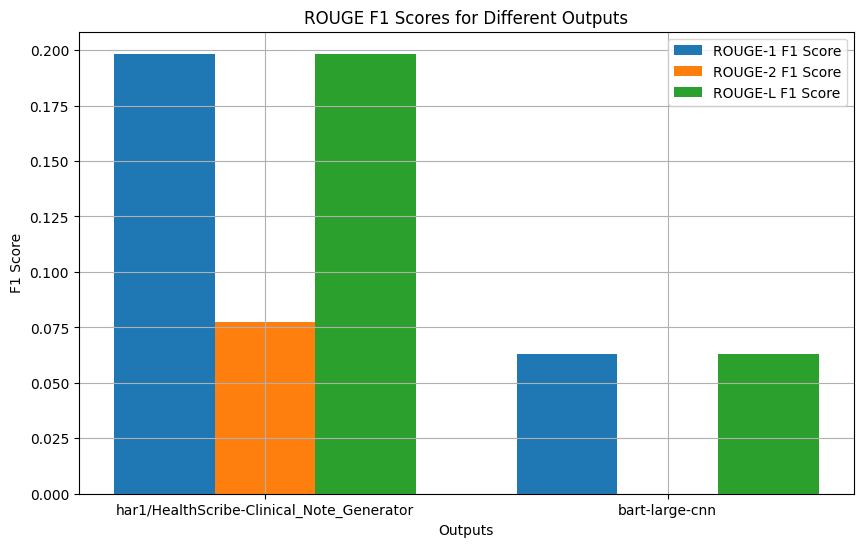

In [ ]:
import matplotlib.pyplot as plt

# Data
outputs = ['har1/HealthScribe-Clinical_Note_Generator' , 'bart-large-cnn']
rouge_1_f1 = [scores_1['rouge1'].fmeasure, scores_2['rouge1'].fmeasure]
rouge_2_f1 = [scores_1['rouge2'].fmeasure, scores_2['rouge2'].fmeasure]
rouge_l_f1 = [scores_1['rougeL'].fmeasure, scores_2['rougeL'].fmeasure]

# Plot
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = range(len(outputs))

plt.bar(index, rouge_1_f1, bar_width, label='ROUGE-1 F1 Score')
plt.bar([i + bar_width for i in index], rouge_2_f1, bar_width, label='ROUGE-2 F1 Score')
plt.bar([i + 2 * bar_width for i in index], rouge_l_f1, bar_width, label='ROUGE-L F1 Score')

plt.xlabel('Outputs')
plt.ylabel('F1 Score')
plt.title('ROUGE F1 Scores for Different Outputs')
plt.xticks([i + bar_width for i in index], outputs)
plt.legend()
plt.grid(True)

plt.show()
